# Holt-Winters Methods
En la clase anterior vimos los <strong> Promedios móviles ponderados exponencialmente </strong> (EWMA) que es un <em> Suavizado exponencial simple </em> usando un solo factor de suavizado $\alpha$ (alpha). Pero no tuvo en cuenta otros factores que contribuyen, como la tendencia y la estacionalidad.

En esta clase veremos el <em> Suavizado exponencial doble y triple </em> con los Métodos Holt-Winters. 

En el <strong> Suavizado exponencial doble </strong> (también conocido como Método de Holt) presentamos un nuevo factor de suavizado $\beta$ (beta) que aborda la tendencia:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
y_t &= l_t + b_t & \text{    modelo estimado}\\
\hat y_{t+h} &= l_t + hb_t & \text{    modelo de pronósticos (} h = \text{# periodos en el futuro)}\end{split}


Con <strong> Suavizado exponencial triple </strong> (también conocido como Método Holt-Winters) presentamos un factor de suavizado $\gamma$ (gamma) que aborda la estacionalidad:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    nivel}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    tendencia}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    estacionalidad}\\
y_t &= (l_t + b_t) c_t & \text{    modelo estimado}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    modelo de pronosticos (} m = \text{# periodos en el futuro)}\end{split}

Aquí $ L $ representa el número de divisiones por ciclo. En nuestro caso, mirando los datos mensuales que muestran un patrón repetitivo cada año, usaríamos $ L = 12 $.

En general, los valores más altos para $ \alpha $, $ \beta $ y $ \gamma $ (valores más cercanos a 1), ponen más énfasis en los datos recientes.

<div class="alert alert-info"><h3>Funciones:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing = Igual que EWMA si se usa el mismo metodo de optimizacion<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black></font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    

### Dataset de pasajeros de avión
Para estos ejemplos, continuaremos utilizando el conjunto de datos de Pasajeros de líneas aéreas internacionales, que proporciona totales mensuales en miles de personas desde enero de 1949 hasta diciembre de 1960.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
# le falta saber la frecuencia, que es mensual
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


___
## Suavizado exponencial simple

La función del suavizado exponencial simple de statsmodels realiza las mismas estimaciones que el método de promedios ponderados de pandas:


In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# a estos metodos se le hace un fit
# fittedvalues obtiene los valores del modelo
# optimized=False se desplaza un vaalor por eso se deshacecon el shift
# si optimized=False se quita se haria con otro metodo y daria disitntos valores

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<div class = "alert alert-danger"> <strong> NOTA: </strong> por alguna razón, cuando <tt> optimized = False </tt> se pasa a <tt>.fit()</tt>, la función statsmodels <tt> SimpleExpSmoothing </tt> desplaza los valores ajustados una fila hacia abajo. Arreglamos esto agregando <tt>.shift(-1)</tt> después de <tt>.fittedvalues</tt> </div>

---
## Suavizado exponencial doble
Cuando el suavizado exponencial simple emplea solo un factor de suavizado $ \alpha $ (alpha), el suavizado exponencial doble agrega un segundo factor de suavizado $ \beta $ (beta) que aborda las tendencias en los datos. Al igual que el factor alpha, los valores para el factor beta están entre cero y uno ($ 0 <\beta≤1 $). El beneficio aquí es que el modelo puede anticipar futuros aumentos o disminuciones donde el modelo de un solo factor solo tendría en cuenta los valores más recientes.

También podemos abordar diferentes tipos de cambio (crecimiento / decadencia) en la tendencia. Si una serie temporal muestra una tendencia inclinada en línea recta, se usaría un ajuste <strong> aditivo </strong>. Si la serie temporal muestra una tendencia exponencial (curva), se usaría un ajuste <strong> multiplicativo </strong>.

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# calculamos el aditivo con 12 meses anteriores

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'add').fit().fittedvalues.shift(-1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.726025
1949-02-01,118,112.923077,112.923077,120.710594
1949-03-01,132,115.857988,115.857988,134.718413
1949-04-01,129,117.879836,117.879836,131.778276
1949-05-01,121,118.359861,118.359861,123.758032


In [15]:
df['DESmult12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'multiplicative').fit().fittedvalues.shift(-1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmult12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.726025,115.382342
1949-02-01,118,112.923077,112.923077,120.710594,121.618649
1949-03-01,132,115.857988,115.857988,134.718413,136.321485
1949-04-01,129,117.879836,117.879836,131.778276,133.114133
1949-05-01,121,118.359861,118.359861,123.758032,124.581833


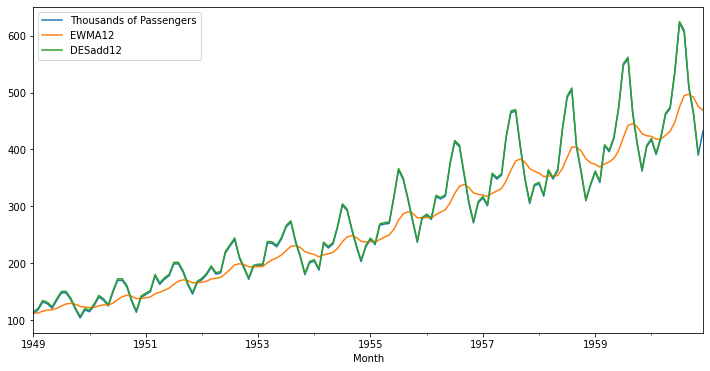

In [18]:
df[['Thousands of Passengers','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);


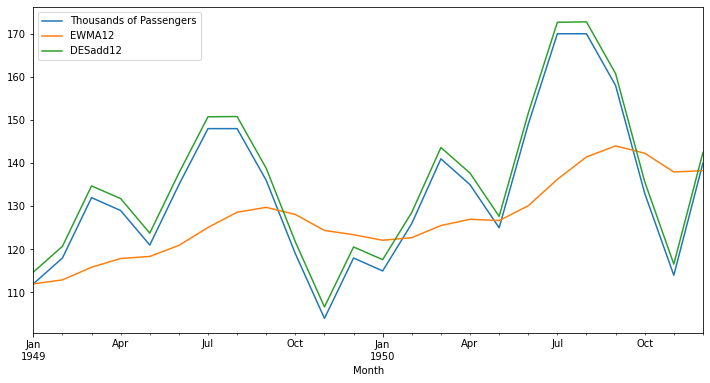

In [17]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
#solo 12 meses para ver la diferencia
#el suaviado DES captura mejot que EWMA12 el modelo

Aquí podemos ver que con el suavizado exponencial doble obtenemos una mejor representación de los datos. Veamos si usar un ajuste estacional multiplicativo ayuda.
YA VIMOS QUE LA SERIE DE PASAJERONS TIENDE A SER MAS EXPLONENCIAL QUE LINEAL

In [19]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmult12,DESmul12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.726025,115.382342,115.382342
1949-02-01,118,112.923077,112.923077,120.710594,121.618649,121.618649
1949-03-01,132,115.857988,115.857988,134.718413,136.321485,136.321485
1949-04-01,129,117.879836,117.879836,131.778276,133.114133,133.114133
1949-05-01,121,118.359861,118.359861,123.758032,124.581833,124.581833


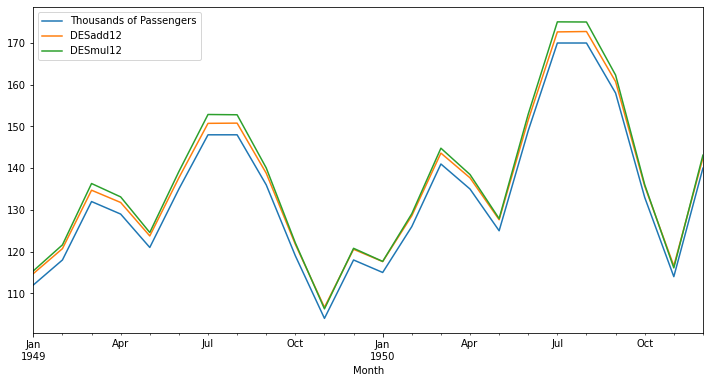

In [20]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6));

Aunque se obtienen valores un poco menores que los valores reales, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la línea verde se superpone casi por completo a los datos originales.

___
## Suavizado exponencial triple
Suavizado exponencial triple o Holt-Winters, añade soporte para la tendencia y la estacionalidad. 



In [21]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()
# L=12 es e seasonal_period

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmult12,DESmul12,TESadd12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.726025,115.382342,115.382342,112.004219
1949-02-01,118,112.923077,112.923077,120.710594,121.618649,121.618649,120.168118
1949-03-01,132,115.857988,115.857988,134.718413,136.321485,136.321485,134.696863
1949-04-01,129,117.879836,117.879836,131.778276,133.114133,133.114133,131.379750
1949-05-01,121,118.359861,118.359861,123.758032,124.581833,124.581833,124.631124


In [22]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmult12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,
1949-01-01,112,112.000000,112.000000,114.726025,115.382342,115.382342,112.004219,111.595038
1949-02-01,118,112.923077,112.923077,120.710594,121.618649,121.618649,120.168118,118.842634
1949-03-01,132,115.857988,115.857988,134.718413,136.321485,136.321485,134.696863,133.333964
1949-04-01,129,117.879836,117.879836,131.778276,133.114133,133.114133,131.379750,127.900174
1949-05-01,121,118.359861,118.359861,123.758032,124.581833,124.581833,124.631124,120.978432


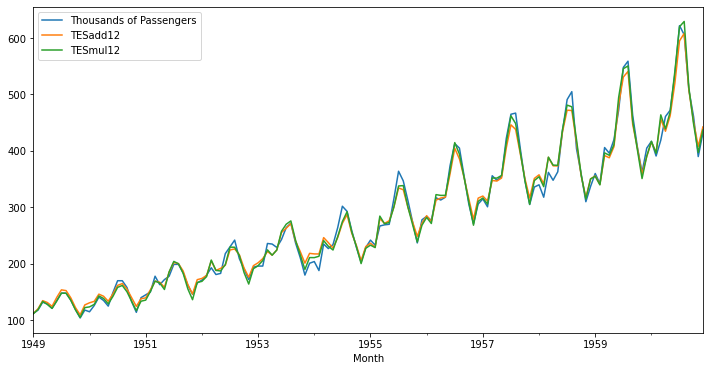

In [23]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6));

In [24]:
## PREDICCIONES A FUTURO

In [25]:
model_add = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
model_mul = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [27]:
forecast_add = model_add.forecast(36)
forecast_mul= model_mul.forecast(36)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


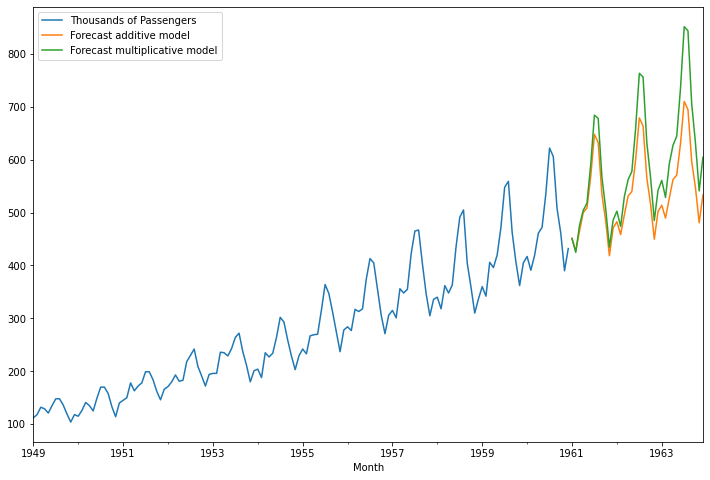

In [28]:
import matplotlib.pyplot as plt

df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_add.plot(label='Forecast additive model');
forecast_mul.plot(label='Forecast multiplicative model');
plt.legend(loc='upper left')

# el modelo multilpicativo captura mejor la tendencia ciclicca de la variacion que aumenta con el tiempo
#el aditivo el camnio es constante y no varia, no captura ese incremento de tipos
#si la tendencia es exponencial = modelo multiplicativo